In [1]:
import pandas as pd
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [15]:
def tsne_reduce(csv, dimensions):
    # Load your dataset
    df = pd.read_csv(csv)
    
    # Separate the dataset into parts: one for t-SNE reduction and one to keep as is
    df_to_reduce = df.loc[:, '0':'8']  # Assuming '0' through '8' are the columns for t-SNE
    df_to_keep = df.drop(columns=['0', '1', '2', '3', '4', '5', '6', '7', '8'])
    
    # Apply t-SNE to the specified columns
    tsne = TSNE(n_components=dimensions, perplexity=30.0, n_iter=1000, random_state=42)
    reduced_data = tsne.fit_transform(df_to_reduce)
    
    # Create a DataFrame for the reduced data
    if dimensions == 2:
        reduced_df = pd.DataFrame(reduced_data, columns=['1-tsne', '2-tsne'])
    elif dimensions == 3:
        reduced_df = pd.DataFrame(reduced_data, columns=['1-tsne', '2-tsne', '3-tsne'])
    
    # Concatenate the reduced data with the other columns
    final_df = pd.concat([reduced_df, df_to_keep.reset_index(drop=True)], axis=1)
    
    return final_df

In [19]:
batters_2  = tsne_reduce('../app/public/app-data/batter_embeddings.csv', 2)
batters_3  = tsne_reduce('../app/public/app-data/batter_embeddings.csv', 3)
pitchers_2 = tsne_reduce('../app/public/app-data/pitcher_embeddings.csv', 2)
pitchers_3 = tsne_reduce('../app/public/app-data/pitcher_embeddings.csv', 3)

In [20]:
# save batters_2 as csv
batters_2.to_csv('../app/public/app-data/batters_tsne_2.csv', index=False)
batters_3.to_csv('../app/public/app-data/batters_tsne_3.csv', index=False)
pitchers_2.to_csv('../app/public/app-data/pitchers_tsne_2.csv', index=False)
pitchers_3.to_csv('../app/public/app-data/pitchers_tsne_3.csv', index=False)

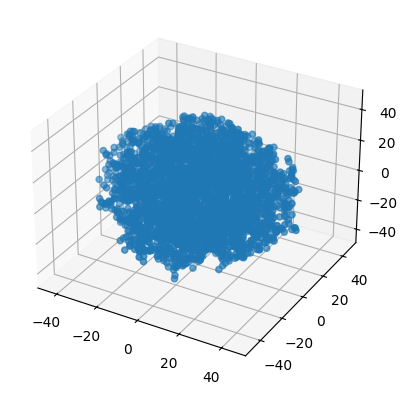

In [21]:
# Plot the data on an interactive chart
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(batters_3['1-tsne'], batters_3['2-tsne'], batters_3['3-tsne'])
plt.show()


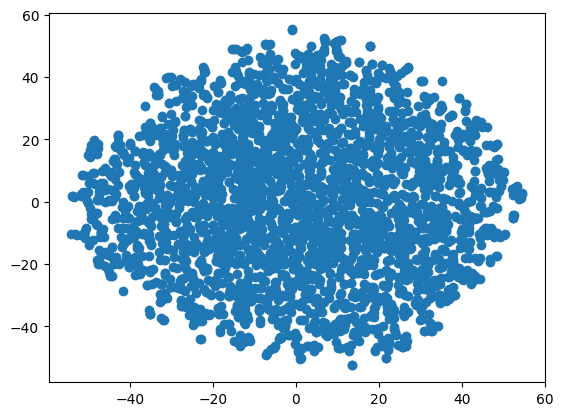

In [23]:
# Plot the batters_2 on an interactive chart
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(batters_2['1-tsne'], batters_2['2-tsne'])
plt.show()

In [ ]:
tsne = TSNE(n_components=3, perplexity=30.0, n_iter=1000, random_state=42)
reduced_data = tsne.fit_transform(df)

reduced_df = pd.DataFrame(reduced_data, columns=['1-tsne', '2-tsne', '3-tsne'])

# Optional Step: Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_df['Dimension 1'], reduced_df['Dimension 2'], reduced_df['Dimension 3'])
ax.set_title('3D visualization of the data after t-SNE reduction')
plt.show()